# Curso de Machine Learning e Inteligencia Artificial para Empresarios 

Co-desarrolladores de este curso: 
- PhD. Alejandro J. Alvarez-Socorro, Director del Laboratorio de Investigación - Zenta Group. 
- PhD. Tomás Vera, Director de Zenta Group.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')

### Emprendiendo en la Industria del Vino

Imaginemos el siguiente escenario. Iniciamos con una start-up en la industria del vino con un enfoque mas moderno, y tratando de aprovechar las nuevas tecnologías emergentes. 

Para planificar sobre que vinos se deberían preparar para colocarlo en producción (i.e., estamos aún en fase de desarrollo) Queremos que nuestro vino comparta algo con los mejores vinos del mundo. Inmediatamente nos surgen preguntas como: 

- ¿Cual es el país con mayor número de vinos producidos?
- ¿Cual es el vino mas vendido en el mundo? 
- ¿Donde se produce?
- ¿Cuales son los principales países productores de vino?
- ¿Que hace que un vino sea bueno?
- ¿Que es mas conveniente a largo plazo, vender vino tinto o blanco? 

y así, muchas otras preguntas. Para intentar responderlas encuentra una base de datos de criticos del vino (Vivino Raiting System) y decide descargarla para analizarla y encontrar respuestas.

### Información Sobre los Datos:

Lo primero que haremos es cargar un archivo csv con pandas. 
Fuente: https://github.com/rfordatascience/tidytuesday/tree/master/data/2019/2019-05-28

In [3]:
#df=pd.read_csv("https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2019/2019-05-28/winemag-data-130k-v2.csv", index_col="Unnamed: 0")
df=pd.read_csv("/Users/aa/MLFORBUSSINESS_DATA/winemag-data-130k-v2.csv", index_col="Unnamed: 0")

Veamos las primeras filas de nuestra tabla

In [4]:
df.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


# Lo que queremos
Nos gustaría explorar nuestra base de datos a fin de responder preguntas simples (que tipicamente requieren calcular algo), junto con la posibilidad de ver esas respuestas de forma visual, permitiendo la posibilidad de transmitir un mensaje mucho mas claro y directo a nuestros socios comerciales (siguiendo el dicho popular: una imagen vale mas que mil palabras). 

## Gráficas de Interés en Análisis Exploratorio de Datos

- Gráficos de linea: Ideales para series temporales. Son el gráfico por defecto que se desplegará al utilizar el método .plot()
- Histogramas: Son ideales para visualizar la frecuencia de un evento. Para desplegarlo podemos usar el método .plot(kind='bar') si hemos agrupado previamente por el tópico de nuestro interés, o bien haciendo .hist()
- Gráficos de dispersión (scatterplots): Permiten mirar patrones de distribución de los datos con respecto a variables de nuestro interés. 
- Gráficos de correlación: Aunque los gráficos de dispersión pueden dar información sobre si existe relación entre dos variables, no no puede cuantificarla directamente. En este caso, los gráficos de correlación hacen siempre referencia a una medida de correlación particular.

Dicho esto, iniciemos el interrogatorio a nuestra base de datos:

In [5]:
# ¿cuantos vinos son producidos en los estados 
df.loc[df.country == 'US', 'country'].count()

54504

In [6]:
# ¿cuantos en Chile?
df.loc[df.country == 'Chile', 'country'].count()

4472

In [7]:
# ¿cuantos en Argentina?
df.loc[df.country == 'Argentina', 'country'].count()

3800

In [8]:
# ¿cuantos en España?
df.loc[df.country == 'Spain', 'country'].count()

6645

In [9]:
# ¿Cuantos en Portugal? 
df.loc[df.country == 'Portugal', 'country'].count()

5691

In [10]:
# y si quisiera una tabla con todos

In [11]:
COUNTRY_WINES=df.groupby('country').size()
COUNTRY_WINES=COUNTRY_WINES.sort_values(ascending=False)

Con las lineas de código anteriores hemos agrupado por país, y hemos calculado cuantos vinos hay por país usando el método size. Luego, hemos re-ordenado la serie temporal resultante, de mayor a menor. ¿Que tal si intentamos graficarla?

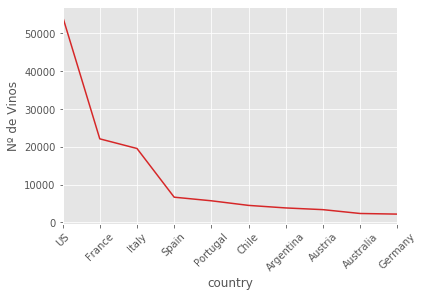

In [12]:
plt.figure()
plt.ylabel('Nº de Vinos')
COUNTRY_WINES[:10].plot(color='tab:red', rot=45)
plt.show()

Así, hemos respondido la pregunta: ¿Cual es el país con mayor número de vinos? 
Respuesta: Estados Unidos, con 54504 vinos. 

Sin embargo, el gráfico de linea no parece ser la mejor herramienta de visualización, pues nuestro proceso es mas de conteo/frecuencia, de manera que un histograma o gráfico de barras vendría mejor para esta tarea:

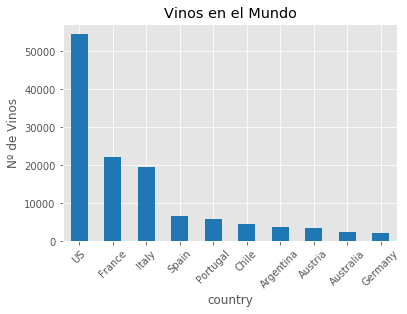

In [13]:
plt.figure()
plt.title('Vinos en el Mundo')
plt.ylabel('Nº de Vinos')
COUNTRY_WINES[:10].plot(kind='bar',color='tab:blue', rot=45)
plt.show()

Aunque ya sabemos cual es el país que mas marcas/variedades de vino produce, no sabemos cual es el vino con mejor valoración. Consultemos nuestros datos:

In [14]:
# vemos los campos de nuestro data frame escribiendo:
print(df.columns)

Index(['country', 'description', 'designation', 'points', 'price', 'province',
       'region_1', 'region_2', 'taster_name', 'taster_twitter_handle', 'title',
       'variety', 'winery'],
      dtype='object')


el máximo puntaje de un vino es 100 puntos, verifiquemoslo:

In [15]:
max(df.points)

100

así queremos filtrar aquellos vinos que logran el máximo puntaje. 

In [16]:
WINELITE=df[df.points==100]

¿Como están distribuidos geográficamente estos? 

In [17]:
COUNTRY_ELITE=WINELITE.groupby('country').size()
COUNTRY_ELITE=COUNTRY_ELITE.sort_values(ascending=False)

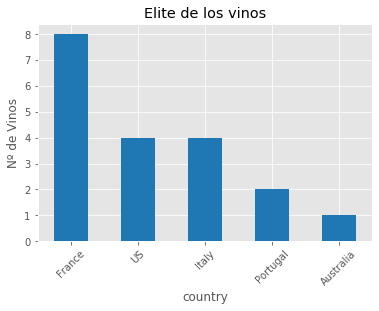

In [18]:
plt.figure()
plt.title('Elite de los vinos')
plt.ylabel('Nº de Vinos')
COUNTRY_ELITE.plot(kind='bar',color='tab:blue', rot=45)
plt.show()

Observamos que Francia toma la delantera, Estados Unidos es desplazado al segundo lugar, Italia permanece en el tercer puesto, España desaparece y Portugal toma la cuarta posición y Australia entra en el top con un único vino. 

In [19]:
WINELITE.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
345,Australia,This wine contains some material over 100 year...,Rare,100,350.0,Victoria,Rutherglen,NaN,Joe Czerwinski,@JoeCz,Chambers Rosewood Vineyards NV Rare Muscat (Ru...,Muscat,Chambers Rosewood Vineyards
7335,Italy,Thick as molasses and dark as caramelized brow...,Occhio di Pernice,100,210.0,Tuscany,Vin Santo di Montepulciano,NaN,NaN,NaN,Avignonesi 1995 Occhio di Pernice (Vin Santo ...,Prugnolo Gentile,Avignonesi
36528,France,This is a fabulous wine from the greatest Cham...,Brut,100,259.0,Champagne,Champagne,NaN,Roger Voss,@vossroger,Krug 2002 Brut (Champagne),Champagne Blend,Krug
39286,Italy,"A perfect wine from a classic vintage, the 200...",Masseto,100,460.0,Tuscany,Toscana,NaN,NaN,NaN,Tenuta dell'Ornellaia 2007 Masseto Merlot (Tos...,Merlot,Tenuta dell'Ornellaia
42197,Portugal,This is the latest release of what has long be...,Barca-Velha,100,450.0,Douro,NaN,NaN,Roger Voss,@vossroger,Casa Ferreirinha 2008 Barca-Velha Red (Douro),Portuguese Red,Casa Ferreirinha


In [20]:
DS1 = df[df['price']>0]

In [21]:
DS2 = DS1[DS1['points'].isnull()==False]

<Figure size 432x288 with 0 Axes>

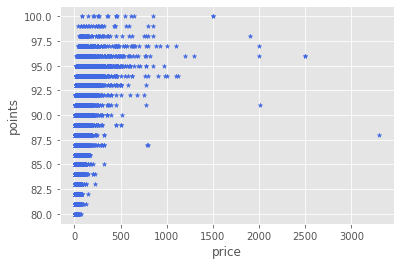

In [22]:
plt.figure()
ax1 = DS2.plot.scatter(x='price',y='points', c='royalblue', marker='*')
plt.show()

<Figure size 432x288 with 0 Axes>

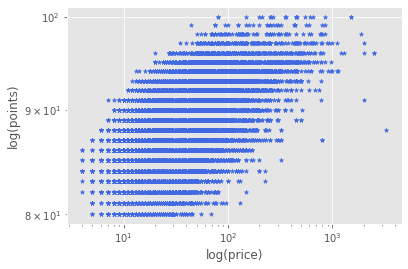

In [23]:
plt.figure()
ax1 = DS2.plot.scatter(x='price',y='points', c='royalblue', marker='*')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('log(price)')
plt.ylabel('log(points)')
plt.show()

<Figure size 432x288 with 0 Axes>

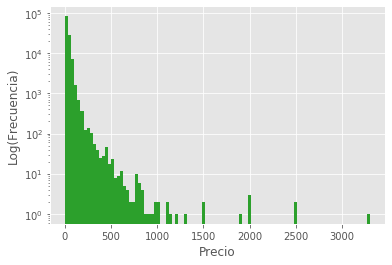

<Figure size 432x288 with 0 Axes>

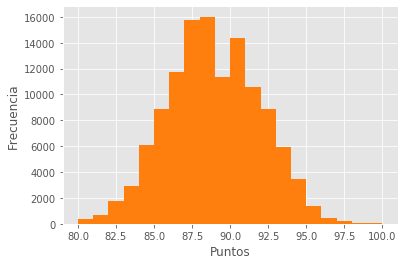

In [24]:
plt.figure()
DS1.hist('price', bins=100, color='tab:green')
plt.yscale('log')
plt.title('')
plt.ylabel('Log(Frecuencia)')
plt.xlabel('Precio')
plt.show()

plt.figure()
DS1.hist('points', bins=20, color='tab:orange')
#plt.yscale('log')
plt.title('')
plt.ylabel('Frecuencia')
plt.xlabel('Puntos')
plt.show()

De lo anterior, uno infiere que hay una ligera correlación entre el puntaje y el precio. ¿Que tan alta o baja es dicha correlación?. Usando el coeficiente de correlación (lineal) de Pearson:

In [28]:
DS2.corr(method='pearson')

,points,price
points,1.000000,0.416167
price,0.416167,1.000000


Puedes continuar haciendo preguntas a los datos, o bien, buscando formas inteligences de graficarlos para descubrir los patrones que los describen.